Pra rodar as células usa o comando SHIFT + ENTER

O objetivo dessa primeira célula é criar permissão pra utilizar o drive. 
Quando rodar a célula será gerado um link. 
Basta clicar no link e fazer login com sua conta do google.
Copia o texto que aparecer e cola no na caixa que aparecer depois dessa célula. ENTER

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
from collections import OrderedDict, Counter
import os
import networkx as nx
import matplotlib.pyplot as plt
from nltk import word_tokenize
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Nessa parte escolhemos a data que será utilizada. Fica a vontade pra mudar.

In [4]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Entrega_v1/Análise_Mídia/mediaframe_export.csv', encoding = 'utf-8')   

df = df[(df['publication_date'] > '2014-09-01 00:00:00') & (df['publication_date'] < '2014-11-30 09:00:00')]
df = df.dropna()

###Palavras mais frequentes

In [5]:
def word_transform(words):
    words = words.split()
    total = [x.lower() for x in words]
    manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                             'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                             'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','pictwittercom','dia','mil','pra',
                             'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
            'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
            'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog', '-', '@','"','...','dilma','*']
    stop_words = stopwords.words('portuguese')
    for i in manual_list_stop_words:
        stop_words.append(i)
    
    total = [x for x in total if x not in stop_words]
    total = [re.sub(r'[,\.!?()]', '', x) for x in total]
    total = [x for x in total if not re.search(r"\d", x)]
    
    long_string = (" ").join(total)
    return long_string

In [6]:
df['text'] = df['text'].apply(word_transform)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


In [7]:
import operator
lista = df['text'].values.tolist()

flat_list = reduce(operator.concat, lista)
flat_list = flat_list.split()

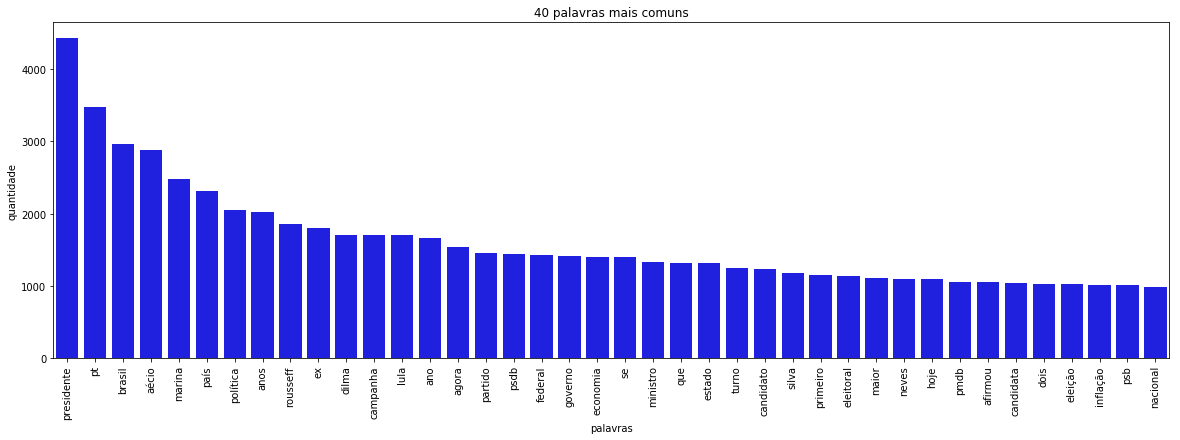

In [8]:
def plot_n_most_common_words(count_data, count_vectorizer, n):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(20, 10/1.6180))
    plt.subplot(title='{} palavras mais comuns'.format(n))
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, color = 'blue')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('palavras')
    plt.ylabel('quantidade')
    plt.show()

count_vectorizer = CountVectorizer()

count_data = count_vectorizer.fit_transform(flat_list)
                                               
plot_n_most_common_words(count_data, count_vectorizer,40)

### Gráfico de centralidade e co-ocorrência

In [9]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Entrega_v1/Análise_Mídia/mediaframe_export.csv', encoding = 'utf-8')   

df = df[(df['publication_date'] > '2014-09-01 00:00:00') & (df['publication_date'] < '2014-11-30 09:00:00')]
df = df.dropna()

In [10]:
df_centralidade = df[['text']]

In [11]:
df_centralidade['text'] = df_centralidade['text'].apply(word_transform)

texto_sem_tags = ' '.join(df_centralidade['text'].tolist())


l_sem_stopwords = texto_sem_tags.split()
t_sem_stopwords = u' '.join(l_sem_stopwords)

lista_tweets = df_centralidade['text'].tolist()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
def polariza_counter(dicionario, df1, df2):
    polaridades = []
    fator_div = 0
    ausentes = []
    for palavra, frequencia in dicionario.items():
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p] * frequencia)
            fator_div += frequencia
        elif p in df2.index:
            polaridades.append(df2.polaridade[p] * frequencia)
            fator_div += frequencia
        else:
            ausentes.append((palavra,frequencia))
    num_pal = len(dicionario)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(fator_div)

    return polaridade, ausentes

freq_words = Counter(l_sem_stopwords)

w_items = freq_words.items()
w_items.sort(key = lambda wc: wc[1])

datapath = '/content/drive/My Drive/Projeto Ana/Utils/Análise 2020/'
oplexicon = 'oplexicon_v3.0/lexico_v3.0.txt'
sentilex1 = 'SentiLex-PT02/SentiLex-lem-PT02.txt'
sentilex2 = 'SentiLex-PT02/SentiLex-flex-PT02.txt'

df_o = pd.read_csv(os.path.join(datapath,oplexicon), header=None, encoding='utf-8', usecols=[0,2], names=[u'palavra',u'polaridade'])
df_o.drop_duplicates(subset=[u'palavra'],  inplace=True)
df_o = df_o.set_index(u'palavra')

df_s1 = pd.read_csv(os.path.join(datapath,sentilex1), header=None, encoding='utf-8', delimiter='.', names=[u'palavra',u'polaridade'])
conserta_pol1 = lambda x: int(x.split(';')[2].split('=')[1])
df_s1.polaridade = df_s1.polaridade.apply(conserta_pol1)
df_s1.drop_duplicates(subset=[u'palavra'], inplace=True)
df_s1 = df_s1.set_index(u'palavra')

In [13]:
def all_pairs(items):
    pairs = []
    nitems = len(items)
    for i, wi in enumerate(items):
        for j in range(i+1, nitems):
            pairs.append((wi, items[j]))
    return pairs

def co_occurrences(lines, words):
 
    wpairs = all_pairs(words)

    co_occur = {}
    for w1, w2 in wpairs:
        rx = re.compile('%s .*%s|%s .*%s' % (w1, w2, w2, w1))
        co_occur[w1, w2] = sum([1 for line in lines if rx.search(line)])

    return co_occur

def co_occurrences_graph(word_hist, co_occur, cutoff=0):
    g = nx.Graph()
    for word, count in word_hist:
        g.add_node(word, count=count)
    for (w1, w2), count in co_occur.iteritems():
        if count<=cutoff:
            continue
        g.add_edge(w1, w2, weight=count)
    return g

In [14]:
n_nodes = 12
popular = w_items[-n_nodes:]
pop_words = [wc[0] for wc in popular]
co_occur = co_occurrences(lista_tweets, pop_words)
wgraph = co_occurrences_graph(popular, co_occur, cutoff=1)
wgraph = list(nx.connected_component_subgraphs(wgraph))[0]
centrality = nx.eigenvector_centrality_numpy(wgraph)
c = centrality.items()
c.sort(key=lambda x:x[1], reverse=True)

In [15]:
rad0 = 0.2
def rescale_arr(arr, amin, amax):
    
    m = arr.min()
    M = arr.max()
 
    s = float(amax-amin)/(M-m)
    d = amin - s*m

    
    return np.clip(s*arr+d,amin,amax)

def plot_graph(wgraph, pos=None, fig=None, title=None):
 
    edge_min_width= 3
    edge_max_width= 12
    label_font = 16
    node_font = 18
    node_alpha = 0.4
    edge_alpha = 0.55
    edge_cmap = plt.cm.Spectral

 
    if fig is None:
        fig, ax = plt.subplots()
    else:
        ax = fig.add_subplot(111)
    fig.subplots_adjust(0,0,1)

  
    sizes = []
    degrees = []
    for n, d in wgraph.nodes(data=True):
        sizes.append(d['count'])
        degrees.append(wgraph.degree(n))

    sizes = rescale_arr(np.array(sizes, dtype=float), 100, 1000)

    
    pos = nx.spring_layout(wgraph) if pos is None else pos
    labels = {}
    width = []
    for n1, n2, d in wgraph.edges(data=True):
        w = d['weight']
        labels[n1, n2] = w
        width.append(w)

    width = rescale_arr(np.array(width, dtype=float), edge_min_width, 
                        edge_max_width)

    nx.draw_networkx_nodes(wgraph, pos, node_size=sizes, node_color=degrees,
                           alpha=node_alpha)
    nx.draw_networkx_edges(wgraph, pos, width=width, edge_color=width,
                           edge_cmap=edge_cmap, alpha=edge_alpha)
    nx.draw_networkx_edge_labels(wgraph, pos, edge_labels=labels, 
                                 font_size=label_font)
    nx.draw_networkx_labels(wgraph, pos, font_size=node_font, font_weight='bold')
    if title is not None:
        ax.set_title(title, fontsize=label_font)
    ax.set_xticks([])
    ax.set_yticks([])

    # Mark centrality axes
    kw = dict(color='k', linestyle='-')
    cross = [ax.axhline(0, **kw), ax.axvline(rad0, **kw)]
    [ l.set_zorder(0) for l in cross]
    
def centrality_layout(wgraph, centrality):

    cent = sorted(centrality.items(), key=lambda x:float(x[1]), reverse=True)
    nodes = [c[0] for c in cent]
    cent  = np.array([float(c[1]) for c in cent])
    rad = (cent - cent[0])/(cent[-1]-cent[0])
    rad = rescale_arr(rad, rad0, 1)
    angles = np.linspace(0, 2*np.pi, len(centrality))
    layout = {}
    for n, node in enumerate(nodes):
        r = rad[n]
        th = angles[n]
        layout[node] = r*np.cos(th), r*np.sin(th)
    return layout

Nessa parte escolhemos qual palavra será o centro do Grafo. Pode escolher outra se for do interesse.

Graph visualization for query:


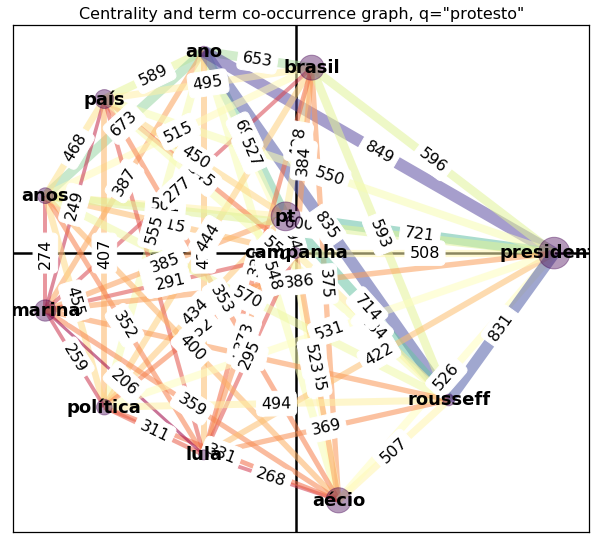

In [16]:
query = 'protesto'
print "Graph visualization for query:"
plot_graph(wgraph, centrality_layout(wgraph, centrality), 
           plt.figure(figsize=(8,8)), 
           title = u'Centrality and term co-occurrence graph, q="{}"'.format(query))

### n-grams e dispersão lexical

In [17]:
q = u'dilma'

In [18]:
tokens = word_tokenize(t_sem_stopwords) 
text = nltk.Text(tokens)
text.concordance(q, width=130, lines=10)

Displaying 10 of 1700 matches:
dido ajuda federal plano hídrico paulo apresentado presidente dilma além fingir preocupada situação paulo ministra deixou boa pet
ta suplicy deixar ministério cultura sair atirando desgoverno dilma dizendo esperar equipe “ resgate economia país ” afinada ment
onaldo caiado dem-go verdade “ general pirro ” venceu eleição dilma herança maldita criada pt herdada mesmo palácio planalto part
das enquanto pt fortalecia candidaturas lula e posteriormente dilma psdb dá indícios que vez facilitar eleição lula presidência r
do candidato lula depender oposição partido fhc fará “ novo ” dilma solução conflitos aliados “ caciques ” peessedebistas deveria
ia água entendi governador pedir perto r $ bilhões presidente dilma estranhei : paulo estado rico nação problema previsto anos at
cote estímulo tributário implementado somente começará gestão dilma deve abrir mão r $ bilhões ano reunião prevista ocorrer terça
nsumidor amplo ipca deve ficar perto cento longo quatros an

In [19]:
max_items = 50
freq_min_b = 10
freq_min_t = 6

In [20]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print a, b

vercesi luigiapvercesi
alexandru solomon
bulach mbulach
erdei gzero
gotaç prgotac
ress erdei
sayeg valdirsayeg
modus operandi
moises goldstein
ricciardi vbricci
robert haller
esteves balbi
vergueiro pedrover
carmela tassi
catap marcoscatap
murray terezamurray
adib jatene
marcus pestana
teori zavascki
cristina kirchner
dileide gaziolla
gaziolla aparecidagaziolla
luigi vercesi
juchem cjuchem
asset management
tasso jereissati
vagner ricciardi
valdir sayeg
harary lharary
uriel villas
evo morales
harald hellmuth
borgonovi marionegraoborgonovi
dotoli arnaldodotoli
nusbaum lnusbaum
pacini benetazzos
moschella arquiteto
mandelbaum suelym
victor germano
jean wyllys
iglesias rzeiglesias
dafré sergio_dafre
khair renatokhair
negrão borgonovi
panayotis poulis
zardetto fzardetto
per capita
cesare battisti
tereza murray
holl lara


In [21]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print a, b, c

ayres brisola jrobrisola
peter cazale pcazale
turíbio liberatto turibioliberatto
alex tanner alextannersss
alvaro salvi alvarosalvi
otto ortlepp renatotto
paes nicolas iory
leonel imenes leonelzucaimenes
arlete pacheco arlpach
laércio zannini arsene
ress erdei gzero
marcela paes nicolas
luigi vercesi luigiapvercesi
el seoud elseoudusp
moises goldstein mgoldstein
valdir sayeg valdirsayeg
l mainzer plmainzer
omar el seoud
vagner ricciardi vbricci
dileide gaziolla aparecidagaziolla
joelmir tavares marcela
holl lara jrmhollidt
myrian macedo myrianmacedo
wilson matiotta loluvies
limongi netto limonginetto
tereza murray terezamurray
milton galindo eldorado
rodrigo viga gaier
aurélio villa niveoavilla
níveo aurélio villa
pablo l mainzer
milton bulach mbulach
fernão lara mesquita
aparecida dileide gaziolla
mario helvio miotto
harald hellmuth hhellmuth
carmela tassi chaves
tassi chaves tassichaves
ivan bertazzo bertazzo
tania tavares taniatma
negrão borgonovi marionegraoborgonovi
leônidas marqu

In [22]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(tokens, n)
xgrams_counter = Counter(xgrams)
df_ngrams = pd.DataFrame(xgrams_counter.items(), columns = [u'n-gramas',u'Frequência'])
df_ngrams = df_ngrams.sort_index(by=u'Frequência', ascending=False)
df_ngrams.set_index([u'n-gramas'], inplace=True)
df_ngrams[0:40]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,Frequência
n-gramas,
"(luiz, inácio, lula, silva)",168
"(ex-presidente, luiz, inácio, lula)",96
"(tribunal, superior, eleitoral, tse)",94
"(ministro, fazenda, guido, mantega)",80
"(margem, erro, dois, pontos)",71
"(supremo, tribunal, federal, stf)",64
"(@, globocom, rio, janeiro)",57
"(ex-presidente, fernando, henrique, cardoso)",47
"(ronaldo, gomes, ferraz, ronferraz)",45


Nessa célula escolhemos as palavras que vão ser utilizadas na dispersão lexical

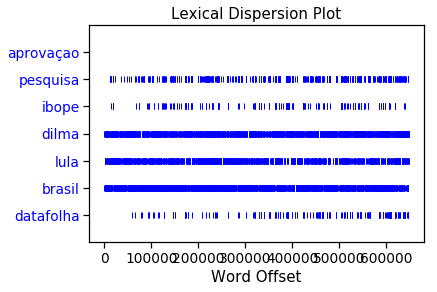

In [23]:
text.dispersion_plot([u'aprovaçao', 
                      u'pesquisa',
                      u'ibope',
                      u'dilma',
                      u'lula',
                      u'brasil',
                      u'datafolha',
                      ])

Frases mais significativas dos tweets

In [24]:
manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                          'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                          'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','Dilma','pictwittercom','dia','mil','pra',
                          'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
        'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
        'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog', '@','"','...']
stop_words = stopwords.words('portuguese')
for i in manual_list_stop_words:
    stop_words.append(i)

In [25]:
def score_sentences(sentences, important_words):
    
    CLUSTER_THRESHOLD = 5  
    scores = []
    sentence_idx = -1
   
    for s in [word_tokenize(s) for s in sentences]:    
        sentence_idx += 1
        word_idx = []
        
        for w in important_words:
            try:
              
                word_idx.append(s.index(w))
            except ValueError, e: # w not in this particular sentence
                pass
        word_idx.sort()
     
        if len(word_idx)== 0: continue
        
        clusters = []
        cluster = [word_idx[0]]
        i = 1
        while i < len(word_idx):
            if word_idx[i] - word_idx[i - 1] < CLUSTER_THRESHOLD:
                cluster.append(word_idx[i])
            else:
                clusters.append(cluster[:])
                cluster = [word_idx[i]]
            i += 1
        clusters.append(cluster)
   
        max_cluster_score = 0
        for c in clusters:
            significant_words_in_cluster = len(c)
            total_words_in_cluster = c[-1] - c[0] + 1
            score = 1.0 * significant_words_in_cluster \
                * significant_words_in_cluster / total_words_in_cluster
            if score > max_cluster_score:
                max_cluster_score = score
        scores.append((sentence_idx, score))
    return scores

In [26]:
def summarize(txt):
    TOP_SENTENCES = 10  
    N = 100  
   
    sentences = [s for s in word_tokenize(txt)]
    normalized_sentences = [s.lower() for s in sentences]
    words = [w.lower() for sentence in normalized_sentences for w in nltk.tokenize.word_tokenize(sentence)]
    fdist = nltk.FreqDist(words)
    top_n_words = [w[0] for w in fdist.items() if w[0] not in stop_words][:N]
    scored_sentences = score_sentences(normalized_sentences, top_n_words)

    avg = np.mean([s[1] for s in scored_sentences])
    std = np.std([s[1] for s in scored_sentences])
    mean_scored = [(sent_idx, score) for (sent_idx, score) in scored_sentences
                   if score > avg + 0.5 * std]
 
    top_n_scored = sorted(scored_sentences, key=lambda s: s[1])[-TOP_SENTENCES:]
    top_n_scored = sorted(top_n_scored, key=lambda s: s[0])
   
    return dict(top_n_summary=[sentences[idx] for (idx, score) in top_n_scored],
                mean_scored_summary=[sentences[idx] for (idx, score) in mean_scored])

In [27]:
sumarios = summarize(texto_sem_tags)
sumarios['top_n_summary'] = set(sumarios['top_n_summary'])
sumarios['mean_scored_summary'] = set(sumarios['mean_scored_summary'])

print(u'palavras mais importantes(1):\n')
for s in sumarios['top_n_summary']:
    print(u'{}\n'.format(s))
    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


palavras mais importantes(1):

atingia

derrotada

prazo

derrotado

acertar

igual

linha

